In [246]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 5.0
chi13 = 1.0
chi23 = 1.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [247]:
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

def f(p):
    return abs(sum(np.array(equations(p))**2)-0)

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS

GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS

ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS

TO MESH THE SYSTEM, LIKE THE WAY BALAJI DID, AND SEARCH ALL THE REGIONS

In [248]:
x_dim = np.arange(0.023, 0.99, 0.1)
y_dim = x_dim

###3D Grid
# z_dim = x_dim
# grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 3))

# m = 0
# for i in range(len(x_dim)):
#     for j in range(len(y_dim)):
#         for k in range(len(z_dim)):
#             grid[m,:] = x_dim[i], y_dim[j], z_dim[k]
#             m+=1

###2D Grid
grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the equations with fsolve function

In [249]:
roots =[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(grid))):
    initial_guess = optimize.fmin(f, (grid[i]))
    pr = optimize.fsolve(equations, initial_guess)
    if (np.abs(equations(pr))<1e-11).all():
        roots.append(pr)
roots = np.array(roots)
r3 = 1.-(roots[:,0]+roots[:,1])
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
              ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]

Optimization terminated successfully.
         Current function value: 1.068703
         Iterations: 28
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 228
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 114
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 148
         Function evaluations: 274
Optimization terminate

E:\python_setup_files\installation_Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)



         Current function value: 0.000000
         Iterations: 101
         Function evaluations: 185
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 91
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 73
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 71
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 109
Optimization terminated successfully.
         Current function 

In [250]:
print("(phi1, phi2, phi3):", (roots[-1,0], roots[-1,1], 1.-(roots[-1,0]+roots[-1,1])))

(phi1, phi2, phi3): (0.2000745763066522, 0.19992544950624336, 0.5999999741871045)


Let's plot "equations" function to see the result:

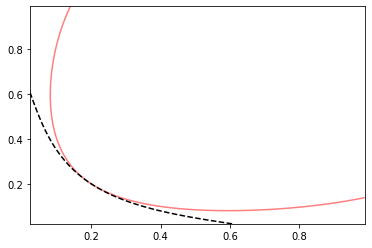

In [251]:
###
x, y = np.meshgrid(
    np.arange(.023, .99, 0.003),
    np.arange(.023, .99, 0.003)
                )
Eq1_fig = plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
Eq2_fig = plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

plt.show()

In [252]:
line_Eq1 = []
line_Eq2 = []
for line in Eq1_fig.collections[0].get_paths():
    line_Eq1.append(line.vertices)
for line in Eq2_fig.collections[0].get_paths():
    line_Eq2.append(line.vertices)
# line_Eq1 = np.reshape(line_Eq1, (-1, 2))
# line_Eq2 = np.reshape(line_Eq2, (-1, 2))

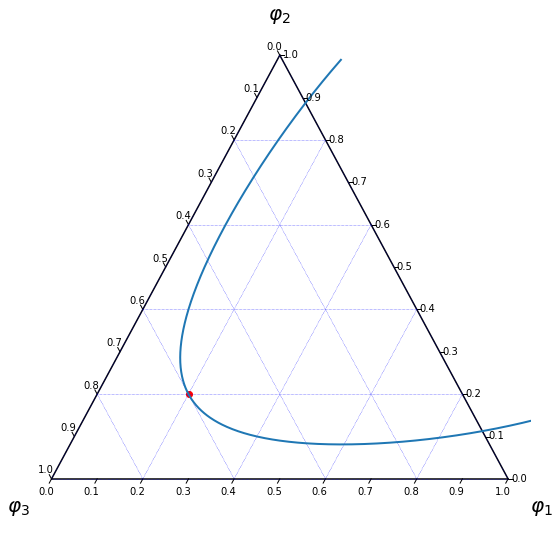

In [263]:
import ternary

points = np.empty((len(line_Eq1[0][:,0]),3))
points[:,0] = line_Eq1[0][:,0]
points[:,1] = line_Eq1[0][:,1]
points[:,2] = 1. - (line_Eq1[0][:,0] + line_Eq1[0][:,1])

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(9, 9)

## Shuffle points for additional plot

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")
tax.scatter([(roots[-1,0], roots[-1,1] ,1.-sum(roots[-1]))], marker='o', color='red', label="Critical Point")
tax.plot(points, linewidth=2.0, label="Spinodal")

tax.show()


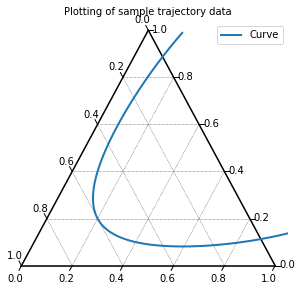

In [259]:
# # plt.plot(line_Eq2[0][:,0], line_Eq2[0][:,1])
# # Sample trajectory plot

points = np.empty((len(line_Eq1[0][:,0]),3))
points[:,0] = line_Eq1[0][:,0]
points[:,1] = line_Eq1[0][:,1]
points[:,2] = 1. - (line_Eq1[0][:,0] + line_Eq1[0][:,1])


figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Plotting of sample trajectory data", fontsize=10)
# Load some data, tuples (x,y,z)

# Plot the data
tax.plot(points, linewidth=2.0, label="Curve")
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()




array([ 0.989     ,  0.13933857, -0.12833857])